# 불균형 데이터셋 생성 후 랜덤포레스트 적용

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 10000, n_features = 10, n_informative = 5, n_redundant = 0, n_clusters_per_class = 1,
                          n_classes = 2, weights = [0.99, 0.01], random_state = 42)

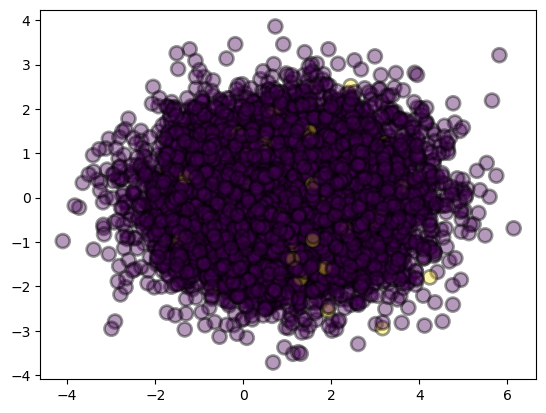

In [4]:
plt.scatter(x = X[:,0], y = X[:,1], marker = "o", c = y, s = 100, edgecolor = "k", linewidth = 2, alpha = 0.4)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test  = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features = 2, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [8]:
y_pred_rf = rf.predict(X_test)

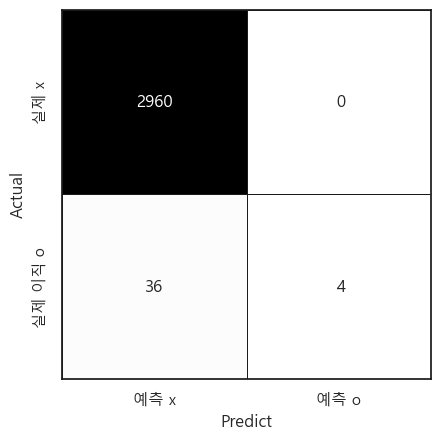

In [15]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np

# 한글 폰트, 선명도
%config inlinebackend.figure_format = "retina"
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False 

cm = pd.crosstab(y_test, y_pred_rf)
cm.columns = ["예측 x", "예측 o"]
cm.index = ["실제 x", "실제 이직 o"]

sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "2d", lw = 0.5, linecolor = 'k')
plt.xlabel("Predict")
ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)
    

plt.ylabel("Actual");

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



# SMOTE 적용

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [19]:
X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

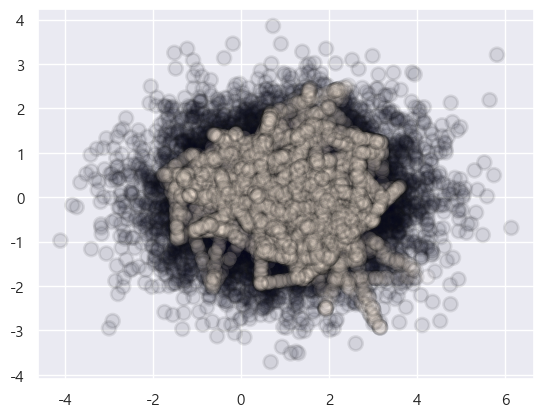

In [20]:
plt.scatter(x = X_resampled[:,0], y = X_resampled[:,1],
           marker = "o", c = y_resampled, s = 100, edgecolor = "k", lw = 2, alpha = 0.1);

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.3, shuffle = True, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features = 2, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

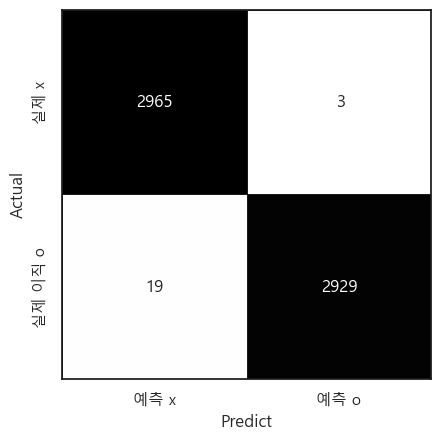

In [25]:
y_pred_smote = rf.predict(X_test)

cm = pd.crosstab(y_test, y_pred_smote)
cm.columns = ["예측 x", "예측 o"]
cm.index = ["실제 x", "실제 이직 o"]

sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "2d", lw = 0.5, linecolor = 'k')
plt.xlabel("Predict")
ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)
    

plt.ylabel("Actual");

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_smote)

array([[2965,    3],
       [  19, 2929]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2968
           1       1.00      0.99      1.00      2948

    accuracy                           1.00      5916
   macro avg       1.00      1.00      1.00      5916
weighted avg       1.00      1.00      1.00      5916



# 계층적 샘플링 후 학습 데이터 셋 오버 샘플링

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 10000, n_features = 10, n_informative = 5, n_redundant = 0, n_clusters_per_class = 1,
                          n_classes = 2, weights = [0.99, 0.01], random_state = 42)

X_train, X_test , y_train, y_test  = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)

In [41]:
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(X_train, y_train)
resampled_X.shape, resampled_y.shape

((13804, 10), (13804,))

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features = 2, random_state = 42)
rf.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

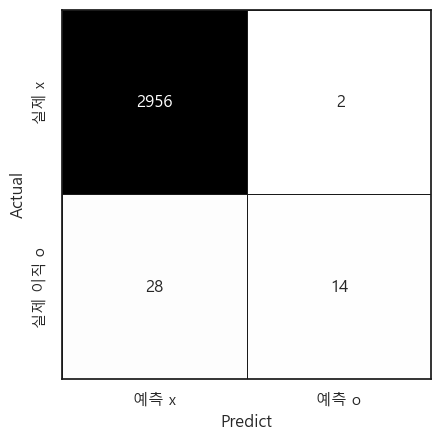

In [43]:
y_pred = rf.predict(X_test)

cm = pd.crosstab(y_test, y_pred)
cm.columns = ["예측 x", "예측 o"]
cm.index = ["실제 x", "실제 이직 o"]

sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "2d", lw = 0.5, linecolor = 'k')
plt.xlabel("Predict")
ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)
    
plt.ylabel("Actual");

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.88      0.33      0.48        42

    accuracy                           0.99      3000
   macro avg       0.93      0.67      0.74      3000
weighted avg       0.99      0.99      0.99      3000



# 가중치 제어

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 10000, n_features = 10, n_informative = 5, n_redundant = 0, n_clusters_per_class = 1,
                          n_classes = 2, weights = [0.99, 0.01], random_state = 42)

X_train, X_test , y_train, y_test  = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)

In [49]:
np.bincount(y_train)

array([6902,   98], dtype=int64)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_features = 2, class_weight = {0:1, 1:1.4}, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [51]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.21      0.35        42

    accuracy                           0.99      3000
   macro avg       0.99      0.61      0.67      3000
weighted avg       0.99      0.99      0.99      3000

